In [ ]:
# 📌 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# 📌 2. Load Dataset
df = pd.read_csv("dataset_umkm_digital_marketing.csv")

# Drop kolom non-numerik yang tidak digunakan
df = df.drop(['ID_UMKM', 'Nama_UMKM', 'Sektor', 'Kota', 'Platform_Marketing'], axis=1)

# Ubah target menjadi klasifikasi berdasarkan interval
def kategori_penjualan(x):
    if x <= 20:
        return 0  # rendah
    elif x <= 40:
        return 1  # sedang
    else:
        return 2  # tinggi

df['Kategori_Penjualan'] = df['Kenaikan_Penjualan (%)'].apply(kategori_penjualan)
df = df.drop('Kenaikan_Penjualan (%)', axis=1)

df.head()


,Jumlah_Follower,Engagement_Rate (%),Biaya_Iklan (IDR),Kategori_Penjualan
0,2786,7.63,1229295,1
1,8779,6.42,2167971,2
2,606,7.83,1839319,2
3,2174,1.83,1311315,1
4,9285,2.12,3675376,0


In [ ]:
# 📌 3. Persiapan Fitur & Target
X = df.drop('Kategori_Penjualan', axis=1)
y = df['Kategori_Penjualan']

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# 📌 4. Training Model
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

# SVM
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)


In [ ]:
# 📌 5. Evaluasi Model
def evaluate_model(name, y_test, y_pred):
    print(f"=== {name} ===")
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

evaluate_model("KNN", y_test, pred_knn)
evaluate_model("SVM", y_test, pred_svm)
evaluate_model("Random Forest", y_test, pred_rf)


=== KNN ===
Akurasi: 0.25
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.19      0.18        16
           1       0.26      0.29      0.27        21
           2       0.32      0.26      0.29        23

    accuracy                           0.25        60
   macro avg       0.25      0.24      0.24        60
weighted avg       0.26      0.25      0.25        60

Confusion Matrix:
 [[3 8 5]
 [7 6 8]
 [8 9 6]]


=== SVM ===
Akurasi: 0.45
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.06      0.10        16
           1       0.44      0.71      0.55        21
           2       0.50      0.48      0.49        23

    accuracy                           0.45        60
   macro avg       0.40      0.42      0.38        60
weighted avg       0.41      0.45      0.40        60

Confusion Matrix:
 [[ 1  9  6]
 [ 1 15  5]
 [ 2 10 11]]


=== Random Forest ===
Akurasi: 

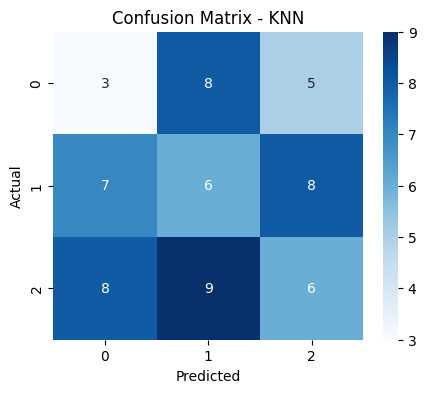

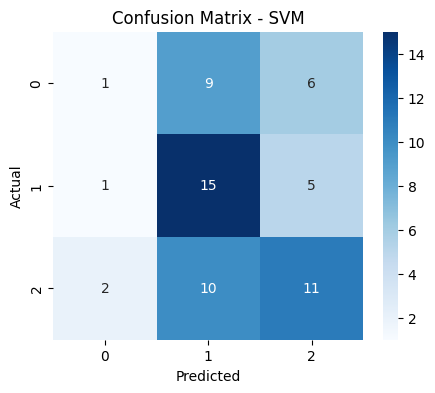

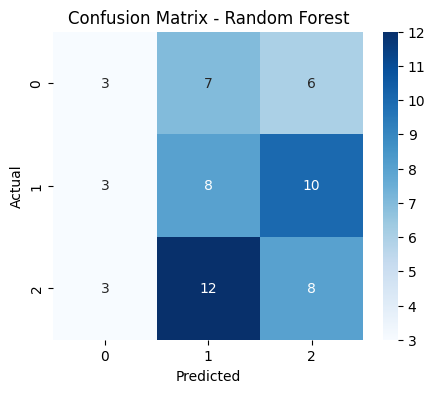

In [ ]:
# 📌 6. Visualisasi Confusion Matrix
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_conf_matrix(y_test, pred_knn, "KNN")
plot_conf_matrix(y_test, pred_svm, "SVM")
plot_conf_matrix(y_test, pred_rf, "Random Forest")


/tmp/ipython-input-9-608241877.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(akurasi.keys()), y=list(akurasi.values()), palette='viridis')


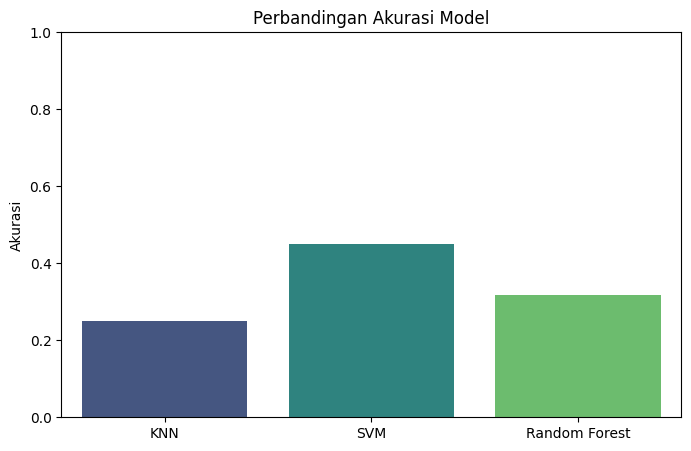

In [ ]:
# 📌 7. Perbandingan Akurasi
akurasi = {
    'KNN': accuracy_score(y_test, pred_knn),
    'SVM': accuracy_score(y_test, pred_svm),
    'Random Forest': accuracy_score(y_test, pred_rf)
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(akurasi.keys()), y=list(akurasi.values()), palette='viridis')
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.ylim(0,1)
plt.show()


In [ ]:
# 📌 8. Analisis & Kesimpulan
comparison_df = pd.DataFrame({
    'Model': ['KNN', 'SVM', 'Random Forest'],
    'Akurasi': [
        accuracy_score(y_test, pred_knn),
        accuracy_score(y_test, pred_svm),
        accuracy_score(y_test, pred_rf)
    ]
})

best_model = comparison_df.sort_values(by='Akurasi', ascending=False).iloc[0]

print("🔍 ANALISIS DAN KESIMPULAN 🔍\n")
print("📊 Perbandingan Akurasi:")
print(comparison_df.to_string(index=False))

print(f"\n✅ Model terbaik: {best_model['Model']} dengan akurasi {best_model['Akurasi']:.2f}")

print("\n💡 Saran Pengembangan:")
print("- Gunakan GridSearchCV untuk optimasi parameter model.")
print("- Coba tambahan fitur baru seperti jenis promosi, jam posting, atau strategi promosi.")
print("- Evaluasi lebih lanjut dengan data lebih besar dan metrik seperti f1-score atau AUC.")


🔍 ANALISIS DAN KESIMPULAN 🔍

📊 Perbandingan Akurasi:
        Model  Akurasi
          KNN 0.250000
          SVM 0.450000
Random Forest 0.316667

✅ Model terbaik: SVM dengan akurasi 0.45

💡 Saran Pengembangan:
- Gunakan GridSearchCV untuk optimasi parameter model.
- Coba tambahan fitur baru seperti jenis promosi, jam posting, atau strategi promosi.
- Evaluasi lebih lanjut dengan data lebih besar dan metrik seperti f1-score atau AUC.
